In [1]:
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
analysis_directory = "analysis"

def create_directory_if_not_exists(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

def create_file_path(directory, file_name):
    file_path = os.path.join(directory, file_name)
    return file_path

def parse_train_line(line):
    epoch = None
    loss = None
    match = re.search("\[epoch =(.+?)\] train_loss =(.+?)\n", line)
    if (match and len(match.groups()) == 2):
        epoch = int(match.groups()[0].strip())
        loss = float(match.groups()[1].strip())
    return (epoch, loss)

def parse_validation_line(line):
    epoch = None
    loss = None
    match = re.search("\[epoch =(.+?)\] validation_loss =(.+?)\n", line)
    if (match and len(match.groups()) == 2):
        epoch = int(match.groups()[0].strip())
        loss = float(match.groups()[1].strip())
    return (epoch, loss)

def parse_test_line(line):
    loss = None
    match = re.search("test_loss =(.+?)\n", line)
    if (match and len(match.groups()) == 1):
        loss = float(match.groups()[0].strip())
    return loss

def read_and_parse_train_data(file_path):
    train_lines = [parse_train_line(line) for line in open(file_path) if "] train_loss =" in line]
    epochs = [entry[0] for entry in train_lines]
    losses = [entry[1] for entry in train_lines]
    return (epochs, losses)

def read_and_parse_validation_data(file_path):
    validation_lines = [parse_validation_line(line) for line in open(file_path) if "] validation_loss =" in line]
    epochs = [entry[0] for entry in validation_lines]
    losses = [entry[1] for entry in validation_lines]
    return (epochs, losses)

def read_and_parse_test_data(file_path):
    test_lines = [parse_test_line(line) for line in open(file_path) if "test_loss =" in line]
    return test_lines[0]

create_directory_if_not_exists(analysis_directory)

In [3]:
generic_1_file_name = "generic_identity_char_lstm_l2.txt"
generic_2_file_name = "generic_identity_char_lstm_l3.txt"

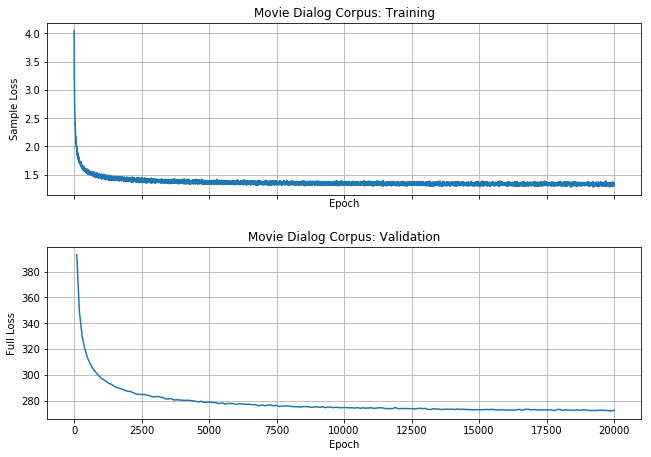

In [5]:
plt.figure(1)
plt.clf()
f, (training, validation) = plt.subplots(2, sharex = True)
generic_training = read_and_parse_train_data(generic_1_file_name)
training.plot(generic_training[0], generic_training[1])
training.set_title("Movie Dialog Corpus: Training")
training.set(xlabel = "Epoch", ylabel = "Sample Loss")
training.grid(True)
generic_validation = read_and_parse_validation_data(generic_1_file_name)
validation.plot(generic_validation[0], generic_validation[1])
validation.set_title("Movie Dialog Corpus: Validation")
validation.set(xlabel = "Epoch", ylabel = "Full Loss")
validation.grid(True)
plt.subplots_adjust(top = 1.5, right = 1.5, wspace = 0.3, hspace = 0.3)
image_file_path = create_file_path(analysis_directory, "generic_1_loss.png")
plt.savefig(image_file_path, bbox_inches = "tight")

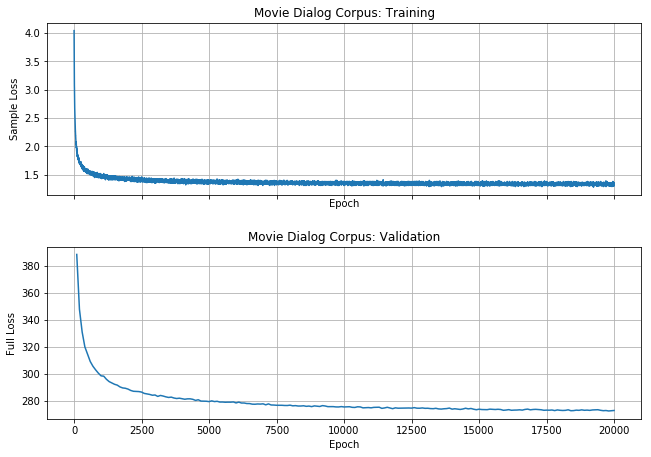

In [6]:
plt.figure(1)
plt.clf()
f, (training, validation) = plt.subplots(2, sharex = True)
generic_training = read_and_parse_train_data(generic_2_file_name)
training.plot(generic_training[0], generic_training[1])
training.set_title("Movie Dialog Corpus: Training")
training.set(xlabel = "Epoch", ylabel = "Sample Loss")
training.grid(True)
generic_validation = read_and_parse_validation_data(generic_2_file_name)
validation.plot(generic_validation[0], generic_validation[1])
validation.set_title("Movie Dialog Corpus: Validation")
validation.set(xlabel = "Epoch", ylabel = "Full Loss")
validation.grid(True)
plt.subplots_adjust(top = 1.5, right = 1.5, wspace = 0.3, hspace = 0.3)
image_file_path = create_file_path(analysis_directory, "generic_2_loss.png")
plt.savefig(image_file_path, bbox_inches = "tight")

In [8]:
generic_1_test_loss = read_and_parse_test_data(generic_1_file_name)
generic_2_test_loss = read_and_parse_test_data(generic_2_file_name)
("generic_1", generic_1_test_loss,
 "generic_2", generic_2_test_loss)

('generic_1', 272.35, 'generic_2', 272.48)

In [3]:
homer_simpson_1_file_name = "homer_simpson_char_lstm_e10k_l3_es1k.txt"
homer_simpson_2_file_name = "homer_simpson_char_lstm_e10k_l4_es1k.txt"
sherlock_holmes_1_file_name = "sherlock_holmes_char_lstm_e10k_l3_es1k.txt"
sherlock_holmes_2_file_name = "sherlock_holmes_char_lstm_e10k_l4_es1k.txt"

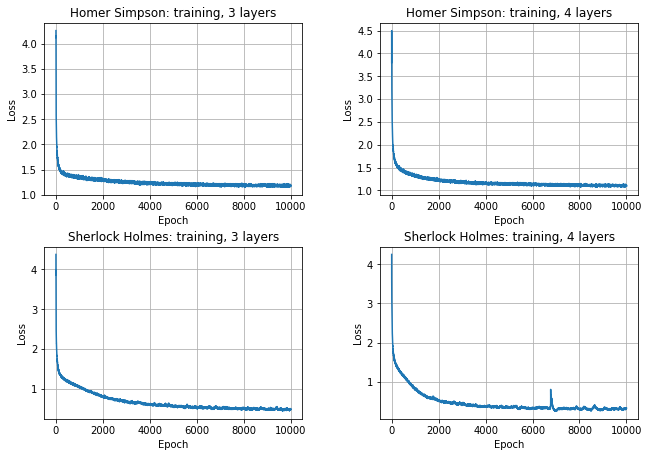

In [4]:
plt.figure(1)

plt.subplot(221)
homer_simpson_1 = read_and_parse_train_data(homer_simpson_1_file_name)
plt.plot(homer_simpson_1[0], homer_simpson_1[1])
plt.title("Homer Simpson: training, 3 layers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(222)
homer_simpson_2 = read_and_parse_train_data(homer_simpson_2_file_name)
plt.plot(homer_simpson_2[0], homer_simpson_2[1])
plt.title("Homer Simpson: training, 4 layers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(223)
sherlock_holmes_1 = read_and_parse_train_data(sherlock_holmes_1_file_name)
plt.plot(sherlock_holmes_1[0], sherlock_holmes_1[1])
plt.title("Sherlock Holmes: training, 3 layers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(224)
sherlock_holmes_2 = read_and_parse_train_data(sherlock_holmes_2_file_name)
plt.plot(sherlock_holmes_2[0], sherlock_holmes_2[1])
plt.title("Sherlock Holmes: training, 4 layers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplots_adjust(top = 1.5, right = 1.5, wspace = 0.3, hspace = 0.3)
image_file_path = create_file_path(analysis_directory, "training_comparison.png")
plt.savefig(image_file_path, bbox_inches = "tight")

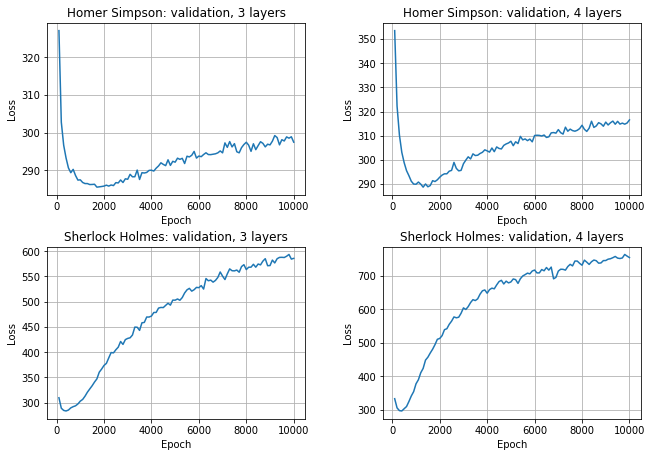

In [5]:
plt.figure(1)

plt.subplot(221)
homer_simpson_1 = read_and_parse_validation_data(homer_simpson_1_file_name)
plt.plot(homer_simpson_1[0], homer_simpson_1[1])
plt.title("Homer Simpson: validation, 3 layers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(222)
homer_simpson_2 = read_and_parse_validation_data(homer_simpson_2_file_name)
plt.plot(homer_simpson_2[0], homer_simpson_2[1])
plt.title("Homer Simpson: validation, 4 layers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(223)
sherlock_holmes_1 = read_and_parse_validation_data(sherlock_holmes_1_file_name)
plt.plot(sherlock_holmes_1[0], sherlock_holmes_1[1])
plt.title("Sherlock Holmes: validation, 3 layers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(224)
sherlock_holmes_2 = read_and_parse_validation_data(sherlock_holmes_2_file_name)
plt.plot(sherlock_holmes_2[0], sherlock_holmes_2[1])
plt.title("Sherlock Holmes: validation, 4 layers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplots_adjust(top = 1.5, right = 1.5, wspace = 0.3, hspace = 0.3)
image_file_path = create_file_path(analysis_directory, "validation_comparison.png")
plt.savefig(image_file_path, bbox_inches = "tight")

In [6]:
homer_simpson_1_test_loss = read_and_parse_test_data(homer_simpson_1_file_name)
homer_simpson_2_test_loss = read_and_parse_test_data(homer_simpson_2_file_name)
sherlock_holmes_1_test_loss = read_and_parse_test_data(sherlock_holmes_1_file_name)
sherlock_holmes_2_test_loss = read_and_parse_test_data(sherlock_holmes_2_file_name)
("homer_simpson_1", homer_simpson_1_test_loss,
 "homer_simpson_2", homer_simpson_2_test_loss,
 "sherlock_holmes_1", sherlock_holmes_1_test_loss,
 "sherlock_holmes_2", sherlock_holmes_2_test_loss)

('homer_simpson_1',
 294.18,
 'homer_simpson_2',
 311.27,
 'sherlock_holmes_1',
 607.19,
 'sherlock_holmes_2',
 790.26)